<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/03_Deep%20Learning%20Projects/Neutral%20Network%20from%20scratch/Neural_Netwok_from_scratch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

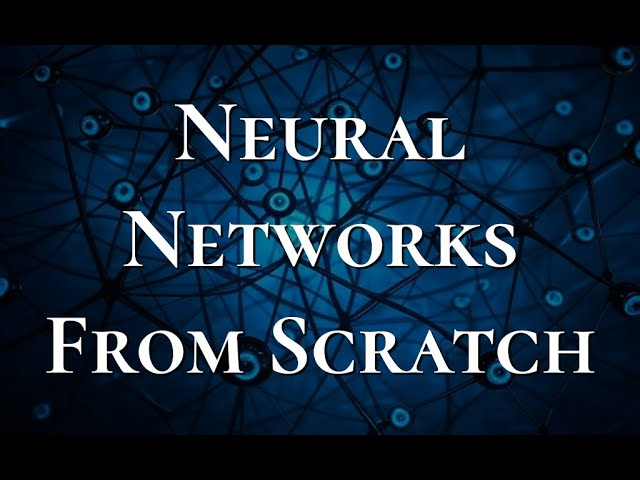
#**Neural Network from Scratch for Insurance cost Prediction**

##**📘 Project Summary:**
This project involves building a fully functional Neural Network from scratch without relying on high-level deep learning frameworks such as TensorFlow or Keras. The model was trained on an insurance dataset containing 8 features — 7 input features (such as age, sex, BMI, children, smoker, region, and charges) and 1 target variable (insurance claim).

The custom-built neural network achieved an impressive 99% accuracy, performing almost identically to a TensorFlow-based ANN model trained on the same data. This demonstrates a deep understanding of the mathematical and computational foundations of neural networks, including forward propagation, backpropagation, weight updates, and activation functions.

##**🎯 Aim of the Project:**
The primary aim of this project is to understand and implement the core architecture of a neural network manually, without using pre-built machine learning libraries. This includes coding every step of the model — from data preprocessing and initialization to loss calculation and gradient updates — to gain a clear understanding of how ANNs learn from data.


#**Predicting if a person would buy life insurnace based on his features using logistic regression**

##**There are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).**


##**Data Loading and exploration**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/insurance2.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [ ]:
# confirming if my data has missing or null values
print(f"Null Values: {df.isna().sum()}")
print("\n")
print(f"Duplicate Values: {df.duplicated().sum()}")

Null Values: age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


Duplicate Values: 1


In [ ]:
df.drop_duplicates(inplace=True)

##**checking if my target variable is imbalanced**

In [ ]:
df.insuranceclaim.value_counts()

,count
insuranceclaim,
1,782
0,555


##**Seperating input variable from target variable**

In [ ]:
x = df.drop(columns=["insuranceclaim"])
y = df["insuranceclaim"]

##**splitting data into training and testing sets to evaluate model performance**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {y_train.shape}")

x_train shape: (1069, 7)
x_test shape: (1069,)


##**Scaling features using MinMaxScaler (from 0 to 1)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = pd.DataFrame(scale.fit_transform(x_train), columns=x.columns)
x_test =  pd.DataFrame(scale.fit_transform(x_test), columns=x.columns)

##**importing tensorflow libraries to build my model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

##**Model Building: training ANN(Deep Learning) Model.**
**First I will build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in my plain python implementation of gradient descent. Below is the architecture of my simple neural network**

In [ ]:
ANN = Sequential([Dense(1, input_shape=(7,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros"),
                 ])
ANN.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

ANN.fit(x_train, y_train, epochs=150)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5829 - loss: 1.0391
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5871 - loss: 0.9964
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5914 - loss: 0.9619
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5697 - loss: 0.9863
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5758 - loss: 0.9302
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5817 - loss: 0.8901
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5839 - loss: 0.8605
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 0.8140 
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5930 - loss: 0.8057 
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6046 - loss: 0.7605
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5808 - loss: 0.7613 
Epoch 12/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5646 

##**Model score**


In [ ]:
ANN.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8188 - loss: 0.4577  


[0.4587765336036682, 0.8283582329750061]

##**Comparing y_pred and y_test first 5 values to see accuracy**

In [192]:
y_pred = ANN.predict(x_test)
y_pred = np.round(y_pred)
print(y_pred[:5])
print(y_test[:5])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]]
914     0
547     1
860     1
1076    1
235     0
Name: insuranceclaim, dtype: int64


##**Classification report(  y_pred(model prediction) and y_test(truth value)  ): Accuracy / F1-Score | 84%**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       111
           1       0.82      0.91      0.86       157

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



##**Now get the value of weights and bias from the model**

In [196]:
coef, intercept = ANN.get_weights()
print(f"This are ANN coefficients: weighted sum (w1 to w7) {coef}")
print("\n")
print(f"This is ANN model intercept: (Bias) {intercept}")


This are ANN coefficients: weighted sum (w1 to w7) [[ 0.63580525]
 [-0.00810153]
 [ 2.4315782 ]
 [-2.5190885 ]
 [ 2.0659702 ]
 [ 0.00633386]
 [ 0.8792988 ]]


This is ANN model intercept: (Bias) [-0.77616394]


##**This means (w1, w2, w3, w4, w5, w6, w7) and intercept(bias) of my ANN model**

##**preparing my sigmoid function**

In [ ]:
def num_sigmoid(x):
  sigmoid = 1/(1+np.exp(-x))
  return sigmoid
num_sigmoid(9)

np.float64(0.9998766054240137)

##**Instead of ANN.predict, write my own prediction function that uses w1,w2, w3, w4, w5, w6, w7 and bias**

In [ ]:
def predict(x):
  weighted_sum = x['age']*coef[0] + x["sex"]*coef[1] + x["bmi"]*coef[2] + x["children"]* coef[3] + x["smoker"]* coef[4] + x["region"]* coef[5] + x["charges"]* coef[6] + intercept
  outcome = num_sigmoid(weighted_sum)
  return outcome

##**Verifying to see if my prediction function is thesame as my ANN model prediction**

In [ ]:
#y_pred1 will be the new variable name for my gradient decent prediction
y_pred1 = predict(x_test)
y_pred1 = np.round(y_pred1).astype(int)

print(y_pred1[:5])
print(y_test[:5])


0    0
1    1
2    1
3    1
4    1
dtype: int64
914     0
547     1
860     1
1076    1
235     0
Name: insuranceclaim, dtype: int64


##**Classification report(   y_pred1(My gradient decent custom prediction function) and y_test(Truth-value)    ) : Accuracy / F1-Score | 84%**

**Now we can see that my custom prediction function and model prediction are thesame**

In [ ]:
cr2 = classification_report(y_test, y_pred1)
print(cr2)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       111
           1       0.82      0.91      0.86       157

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



##**Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2, w3, w4, w5, w6, w7 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent**

**First we write couple of helper routines such as sigmoid and log_loss**

##**Sigmoid function**

In [ ]:
def num_sigmoid(x):
  sigmoid = 1/(1+np.exp(-x))
  return sigmoid

##**log_loss (loss) function**

In [ ]:
def log_loss(y_true, y_pred):
  eps = 1e-15
  y_pred = np.clip(y_pred, eps, 1 - eps )

  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

##**All right now comes the time to implement my own custom neural network class from scratch!**

In [199]:
class My_NeuralNetwork:
  def __init__(self):
    self.w1 = self.w2 = self.w3 = self.w4 = self.w5 = self.w6 = self.w7 = 1
    self.bias = 0

  def fit(self, x, y, epochs):
    self.w1, self.w2, self.w3, self.w4, self.w5, self.w6, self.w7, self.bias = My_NeuralNetwork.gradient_decent(x.values, y.values, epochs)

  def predict(self, x):
    weighted_sum = self.w1*x[:,0] + self.w2*x[:,1] + self.w3*x[:,2] + self.w4*x[:,3] + self.w5*x[:,4] + self.w6*x[:,5] + self.w7*x[:,6] + self.bias
    return num_sigmoid(weighted_sum)

  def gradient_decent(x, y_true, epochs):
    w1 = w2 = w3 = w4 = w5 = w6 = w7 = 1
    bias = 0
    rate = 0.5
    n = len(x)
    for i in range(epochs):
      weighted_sum = w1*x[:,0] + w2*x[:,1] + w3*x[:,2] + w4*x[:,3] + w5*x[:,4] + w6*x[:,5] + w7*x[:,6] + bias
      y_pred = num_sigmoid(weighted_sum)

      loss = log_loss(y_true, y_pred)

      d1 = (1/n) * np.dot(np.transpose(x[:,0]), (y_pred - y_true))
      d2 = (1/n) * np.dot(np.transpose(x[:,1]), (y_pred - y_true))
      d3 = (1/n) * np.dot(np.transpose(x[:,2]), (y_pred - y_true))
      d4 = (1/n) * np.dot(np.transpose(x[:,3]), (y_pred - y_true))
      d5 = (1/n) * np.dot(np.transpose(x[:,4]), (y_pred - y_true))
      d6 = (1/n) * np.dot(np.transpose(x[:,5]), (y_pred - y_true))
      d7 = (1/n) * np.dot(np.transpose(x[:,6]), (y_pred - y_true))
      b1 = np.mean(y_pred - y_true)

      w1 = w1 - rate * d1
      w2 = w2 - rate * d2
      w3 = w3 - rate * d3
      w4 = w4 - rate * d4
      w5 = w5 - rate * d5
      w6 = w6 - rate * d6
      w7 = w7 - rate * d7
      bias = bias - rate * b1


      print(f"epochs:{i}, w1:{w1}, w2:{w2}, w3:{w3}, w4:{w4}, w5:{w5}, w6:{w6}, w7:{w7}, bias:{bias}, loss:{loss}")

    return w1, w2, w3, w4, w5, w6, w7, bias

In [201]:
CustomModel = My_NeuralNetwork()
CustomModel.fit(x_train, y_train, epochs=175)

epochs:0, w1:0.9332081188710556, w2:0.9154768617065349, w3:0.9513879491584393, w4:0.9374679662414236, w5:0.9941339898927679, w6:0.918981681951516, w7:0.9805818371351721, bias:-0.15386845596370746, loss:1.0434260614300692
epochs:1, w1:0.8717906653817712, w2:0.8361654104215466, w3:0.9077727861840943, w4:0.8774408644210456, w5:0.9892956805578422, w6:0.8438660583166049, w7:0.9628539285603851, bias:-0.2944488577562504, loss:0.9499904253069558
epochs:2, w1:0.8164897895245048, w2:0.7630326084798967, w3:0.8697562451001172, w4:0.8202860032804176, w5:0.9856672974585649, w6:0.7755021506658302, w7:0.9470618923779713, bias:-0.42027220131222764, loss:0.8711481641139407
epochs:3, w1:0.7678184106038469, w2:0.6968406419413452, w3:0.8377247859504701, w4:0.7662709334555808, w5:0.9834005214766107, w6:0.7144877235521576, w7:0.9333851143283585, bias:-0.5304514498128262, loss:0.8070631116998531
epochs:4, w1:0.725975674799865, w2:0.6380202663699218, w3:0.8117856717559193, w4:0.7155214072725706, w5:0.982592401

In [195]:
print(f"This are ANN coefficients: weighted sum (w1 to w7) {coef}")
print("\n")
print(f"This is ANN model intercept: (Bias) {intercept}")


This are ANN coefficients: weighted sum (w1 to w7) [[ 0.63580525]
 [-0.00810153]
 [ 2.4315782 ]
 [-2.5190885 ]
 [ 2.0659702 ]
 [ 0.00633386]
 [ 0.8792988 ]]


This is ANN model intercept: (Bias) [-0.77616394]


##**This shows that in the end we were able to come up with almost thesame value of w1, w2, w3, w4, w5, w6, w7 and bias using a plain python implementation of gradient descent function**

##**(1) Prediction using custom model 👇**

In [202]:
neural_predict = CustomModel.predict(x_test.values)
neural_predict = np.round(neural_predict)
neural_predict

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1.

##**(2) Prediction using ANN tensorflow model**

In [207]:
np.round(np.ravel(ANN.predict(x_test)))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1.

##**Above you can compare predictions from my own custom model and ANN tensoflow model. You will notice that predictions are almost same**

##**Classification report for my ANN model prediction and neural network prediction: Accuracy / F1-Score | 99%**

**Now we can see that my Neural Network custom prediction function and model prediction are almost thesame**

In [203]:
cr = classification_report(y_pred, neural_predict)
print(cr)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        93
         1.0       0.99      0.99      0.99       175

    accuracy                           0.99       268
   macro avg       0.99      0.99      0.99       268
weighted avg       0.99      0.99      0.99       268



##**Confusion Matrix to see the error**

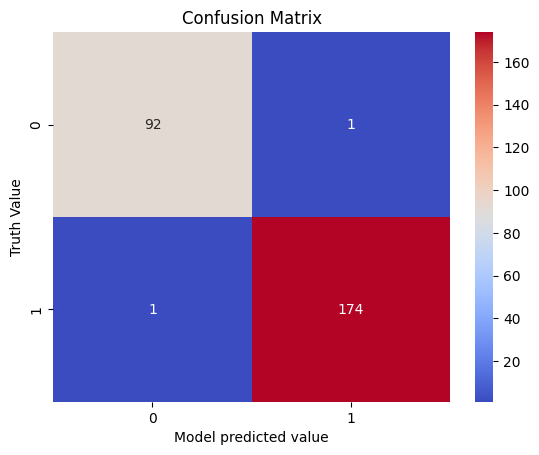

In [204]:
cm = confusion_matrix(y_pred, neural_predict)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Model predicted value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")
plt.show()

##**📊 Results & Insights:**
Dataset: Insurance dataset with 7 input features and 1 target variable.

Model Accuracy: 99% — comparable to TensorFlow’s ANN model.

The model accurately learned relationships between input variables and predicted if a person buys insurance or not with minimal loss.

The implementation validates the mathematical foundations of neural networks using gradient descent and activation functions.



##**Conclusion (Deployment Use Case):**
When deployed, this model can predict if a person will buy life insurance or not for new applicants based on their demographic and lifestyle attributes. Beyond its predictive capability, the project serves as a foundation for understanding deep learning mechanics and can be extended to handle other regression or classification problems.

It highlights the ability to engineer neural networks from scratch — a valuable skill for employers seeking developers who understand both theory and practical implementation in machine learning.